# Google Play Store Apps 

prediction of app ratings from the given dataset 

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


In [325]:
dataset= pd.read_csv('googleplaystore.csv')

In [326]:
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [327]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [328]:
cols_selected = ['Category',
        'Content Rating',

'Last Updated',
'Rating',
'Reviews',
'Size',
'Installs',
'Type',
'Price'
]

In [329]:
data = dataset[cols_selected]

In [330]:
data

,Category,Content Rating,Last Updated,Rating,Reviews,Size,Installs,Type,Price
0,ART_AND_DESIGN,Everyone,"January 7, 2018",4.1,159,19M,"10,000+",Free,0
1,ART_AND_DESIGN,Everyone,"January 15, 2018",3.9,967,14M,"500,000+",Free,0
2,ART_AND_DESIGN,Everyone,"August 1, 2018",4.7,87510,8.7M,"5,000,000+",Free,0
3,ART_AND_DESIGN,Teen,"June 8, 2018",4.5,215644,25M,"50,000,000+",Free,0
4,ART_AND_DESIGN,Everyone,"June 20, 2018",4.3,967,2.8M,"100,000+",Free,0
...,...,...,...,...,...,...,...,...,...
10836,FAMILY,Everyone,"July 25, 2017",4.5,38,53M,"5,000+",Free,0
10837,FAMILY,Everyone,"July 6, 2018",5.0,4,3.6M,100+,Free,0
10838,MEDICAL,Everyone,"January 20, 2017",NaN,3,9.5M,"1,000+",Free,0
10839,BOOKS_AND_REFERENCE,Mature 17+,"January 19, 2015",4.5,114,Varies with device,"1,000+",Free,0


# cleaning

In [331]:
data.isna().sum()

Category             0
Content Rating       1
Last Updated         0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
dtype: int64

In [332]:
data.Rating.value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [333]:
#removing 19
data = data[data.Rating!=19]

In [334]:
data['Rating'].fillna((data['Rating']).median(),inplace=True)

C:\Users\roshinibhaskar\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [335]:
data['Type']=data['Type'].map({'Free':0,'Paid':1})# since type has only Free and Paid data types

C:\Users\roshinibhaskar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [336]:
data['Type'].fillna((data['Type']).median(),inplace=True)

In [337]:
data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

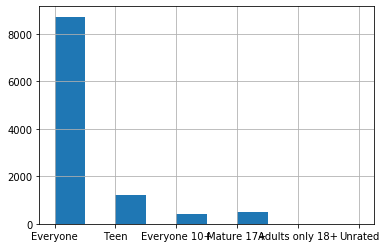

In [338]:
data['Content Rating'].hist()

In [339]:
data['Content Rating'].fillna('Everyone')

0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10836      Everyone
10837      Everyone
10838      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 10840, dtype: object

In [340]:
#one hot encoding
from sklearn import preprocessing 
  
category_list = data['Content Rating'].unique().tolist() 
category_list = ['cont_' + word for word in category_list]
data = pd.concat([data, pd.get_dummies(data['Content Rating'], prefix='cat')], axis=1)

In [341]:
#one hot encoding
from sklearn import preprocessing 
  
category_list = data['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
data = pd.concat([data, pd.get_dummies(data['Category'], prefix='cat')], axis=1)

In [342]:
#data.Category.value_counts()

In [343]:
data['Price'] = data['Price'].str.replace('$','').str.replace(',','').astype(float)

In [344]:
data['Installs'] = data['Installs'].str.replace('+','').str.replace(',','').astype(float)

In [345]:
data.Size.value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
241k                     1
243k                     1
387k                     1
865k                     1
582k                     1
Name: Size, Length: 461, dtype: int64

In [346]:
k_indices = data['Size'].loc[data['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(data.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1000).apply(lambda x: round(x, 2)).astype(str))
data.loc[k_indices,'Size'] = converter

In [347]:
data['Size'] = data['Size'].apply(lambda x: x.strip('M'))
data.Size[data['Size'] == 'Varies with device'] = 0
data['Size'] = data['Size'].astype(float)

C:\Users\roshinibhaskar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [348]:
data.Size

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     0.0
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [349]:
data

,Category,Content Rating,Last Updated,Rating,Reviews,Size,Installs,Type,Price,cat_Adults only 18+,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,ART_AND_DESIGN,Everyone,"January 7, 2018",4.1,159,19.0,10000.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,ART_AND_DESIGN,Everyone,"January 15, 2018",3.9,967,14.0,500000.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,ART_AND_DESIGN,Everyone,"August 1, 2018",4.7,87510,8.7,5000000.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,ART_AND_DESIGN,Teen,"June 8, 2018",4.5,215644,25.0,50000000.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,ART_AND_DESIGN,Everyone,"June 20, 2018",4.3,967,2.8,100000.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,FAMILY,Everyone,"July 25, 2017",4.5,38,53.0,5000.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
10837,FAMILY,Everyone,"July 6, 2018",5.0,4,3.6,100.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
10838,MEDICAL,Everyone,"January 20, 2017",4.3,3,9.5,1000.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
10839,BOOKS_AND_REFERENCE,Mature 17+,"January 19, 2015",4.5,114,0.0,1000.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualization

Text(0.5, 1.0, 'Total apps of each Category')

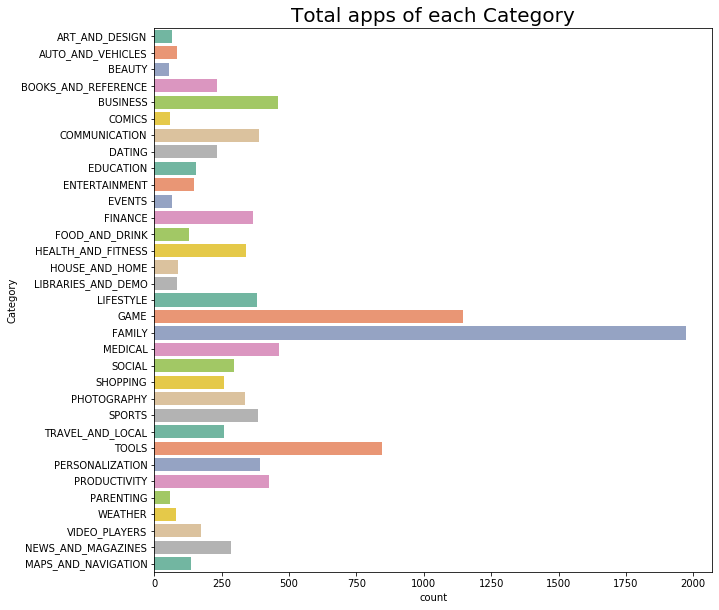

In [350]:
plt.figure(figsize=(10,10))
g = sns.countplot(y="Category",data=data, palette = "Set2")
plt.title('Total apps of each Category',size = 20)

Text(0.5, 1.0, 'Total apps of each Category')

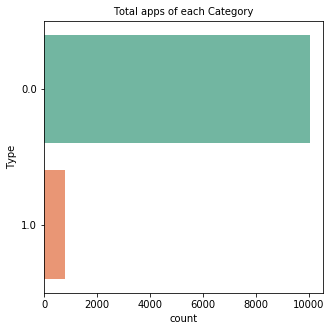

In [351]:
plt.figure(figsize=(5,5))
g = sns.countplot(y="Type",data=data, palette = "Set2")
plt.title('Total apps of each Category',size = 10)
#0-for free
#1 for paid

Text(0.5, 1.0, 'Price (0-10$) - Installs')

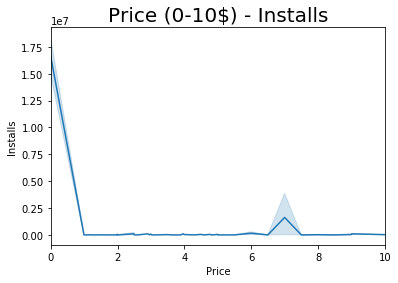

In [352]:
g = sns.lineplot(x="Price", y="Installs", data=data)
g.set(xlim=(0, 10))
plt.title('Price (0-10$) - Installs',size = 20)

# Prediction

In [353]:
data

,Category,Content Rating,Last Updated,Rating,Reviews,Size,Installs,Type,Price,cat_Adults only 18+,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,ART_AND_DESIGN,Everyone,"January 7, 2018",4.1,159,19.0,10000.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,ART_AND_DESIGN,Everyone,"January 15, 2018",3.9,967,14.0,500000.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,ART_AND_DESIGN,Everyone,"August 1, 2018",4.7,87510,8.7,5000000.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,ART_AND_DESIGN,Teen,"June 8, 2018",4.5,215644,25.0,50000000.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,ART_AND_DESIGN,Everyone,"June 20, 2018",4.3,967,2.8,100000.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,FAMILY,Everyone,"July 25, 2017",4.5,38,53.0,5000.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
10837,FAMILY,Everyone,"July 6, 2018",5.0,4,3.6,100.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
10838,MEDICAL,Everyone,"January 20, 2017",4.3,3,9.5,1000.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
10839,BOOKS_AND_REFERENCE,Mature 17+,"January 19, 2015",4.5,114,0.0,1000.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [354]:
X= data.iloc[:,5:].values
y = data.iloc[:,4:5].values

In [355]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size =0.2 , random_state =0)


In [356]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [357]:
regressor.score(X_test,y_test)*100

53.23561254241624

In [358]:
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor( random_state =0)
regressor1.fit(X_train,y_train)
regressor1.score(X_test,y_test)*100

63.88147185384282

In [359]:
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor(n_estimators = 300 , random_state=0)
regressor.fit(X_test,y_test)
regressor.score(X_test,y_test)*100

C:\Users\roshinibhaskar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



79.75484822637799

for this dataset RandomForestRegression seems to be the better algorithm for predicting ratings